In [1]:
!pip install scipy
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error

In [5]:
df = pd.read_excel("energy.xlsx", index_col="DATE", parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [6]:
df.shape

(408, 1)

In [7]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [8]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [9]:
df.columns = ['producao']

<Axes: xlabel='DATE'>

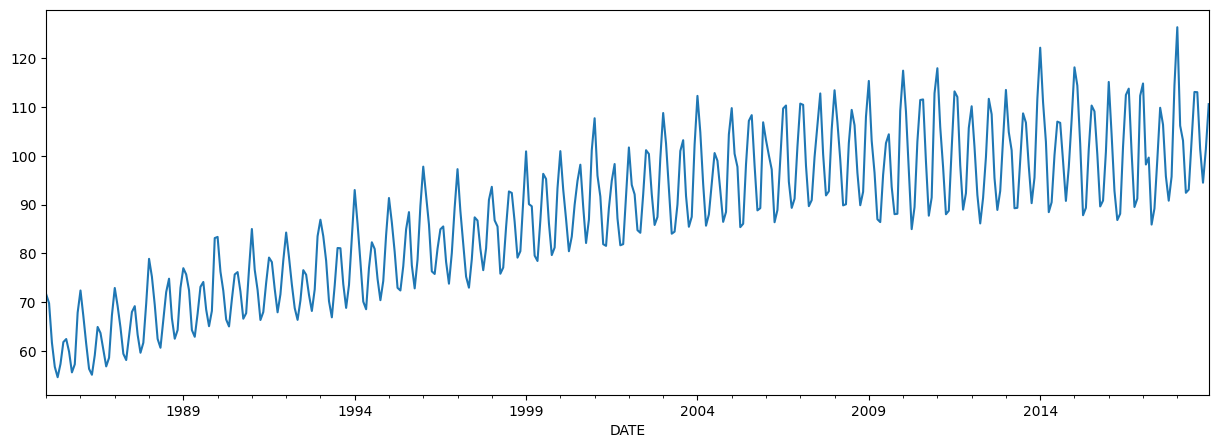

In [10]:
df['producao'].plot(figsize=(15, 5))

<Figure size 800x600 with 0 Axes>

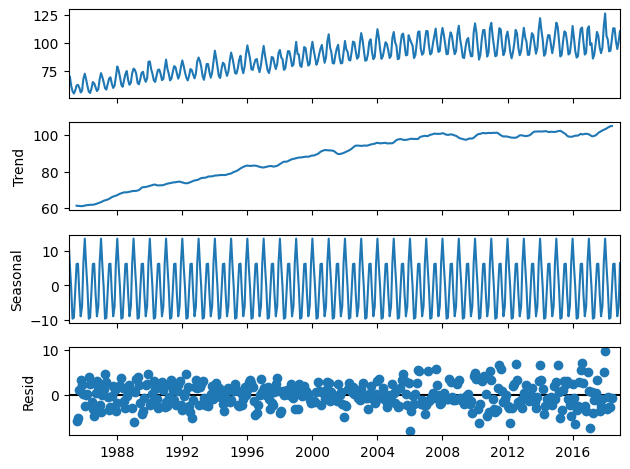

In [13]:
resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(8, 6))
fig = resultado.plot()

In [15]:
result = adfuller(df['producao'].dropna())

print(f'Teste ADF:{result[0]}')
print(f'p-valor: {result[1]}')

Teste ADF:-2.252399047046594
p-valor: 0.18777984601967806


In [16]:
result = adfuller(df['producao'].diff().dropna())

print(f'Teste ADF:{result[0]}')
print(f'p-valor: {result[1]}')

Teste ADF:-7.450892277526341
p-valor: 5.67456995585561e-11


In [19]:
fit_arima = auto_arima(df,d=1, start_p=1, star_q=1,max_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion="aic",
                       trace=True,
                       error_action="ignore",
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[6]             : AIC=1970.075, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.30 sec
 ARIMA(1,1,2)(0,1,1)[6]             : AIC=2064.375, Time=0.65 sec
 ARIMA(1,1,2)(1,1,0)[6]             : AIC=inf, Time=0.75 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1929.636, Time=6.30 sec
 ARIMA(1,1,2)(2,1,0)[6]             : AIC=inf, Time=5.44 sec
 ARIMA(1,1,2)(2,1,2)[6]             : AIC=1869.816, Time=8.63 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1867.969, Time=4.80 sec
 ARIMA(1,1,2)(0,1,2)[6]             : AIC=2014.992, Time=1.06 sec
 ARIMA(0,1,2)(1,1,2)[6]             : AIC=1874.900, Time=2.23 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=5.88 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=1.77 sec
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1

In [20]:
model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,2,6))
sarimax_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
sarimax_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Fri, 29 Nov 2024   AIC                           1866.400
Time:                                        17:47:10   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.055      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.180      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
pred = sarimax_result.get_prediction(start=-12)
pred_media = pred.predicted_mean

In [25]:
intervalo_confianca = pred.conf_int()
limite_abaixo = intervalo_confianca.iloc[:,0]
limite_acima = intervalo_confianca.iloc[:,1]

limite_abaixo[0], limite_acima[0]

<ipython-input-25-27714e5ab185>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_abaixo[0], limite_acima[0]


(115.1447404570401, 124.45517675290846)

In [27]:
pred_media[0]

<ipython-input-27-58325e59c40e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_media[0]


119.79995860497428

In [28]:
datas_prev = np.array(pred_media.index)
datas = np.array(df.index)

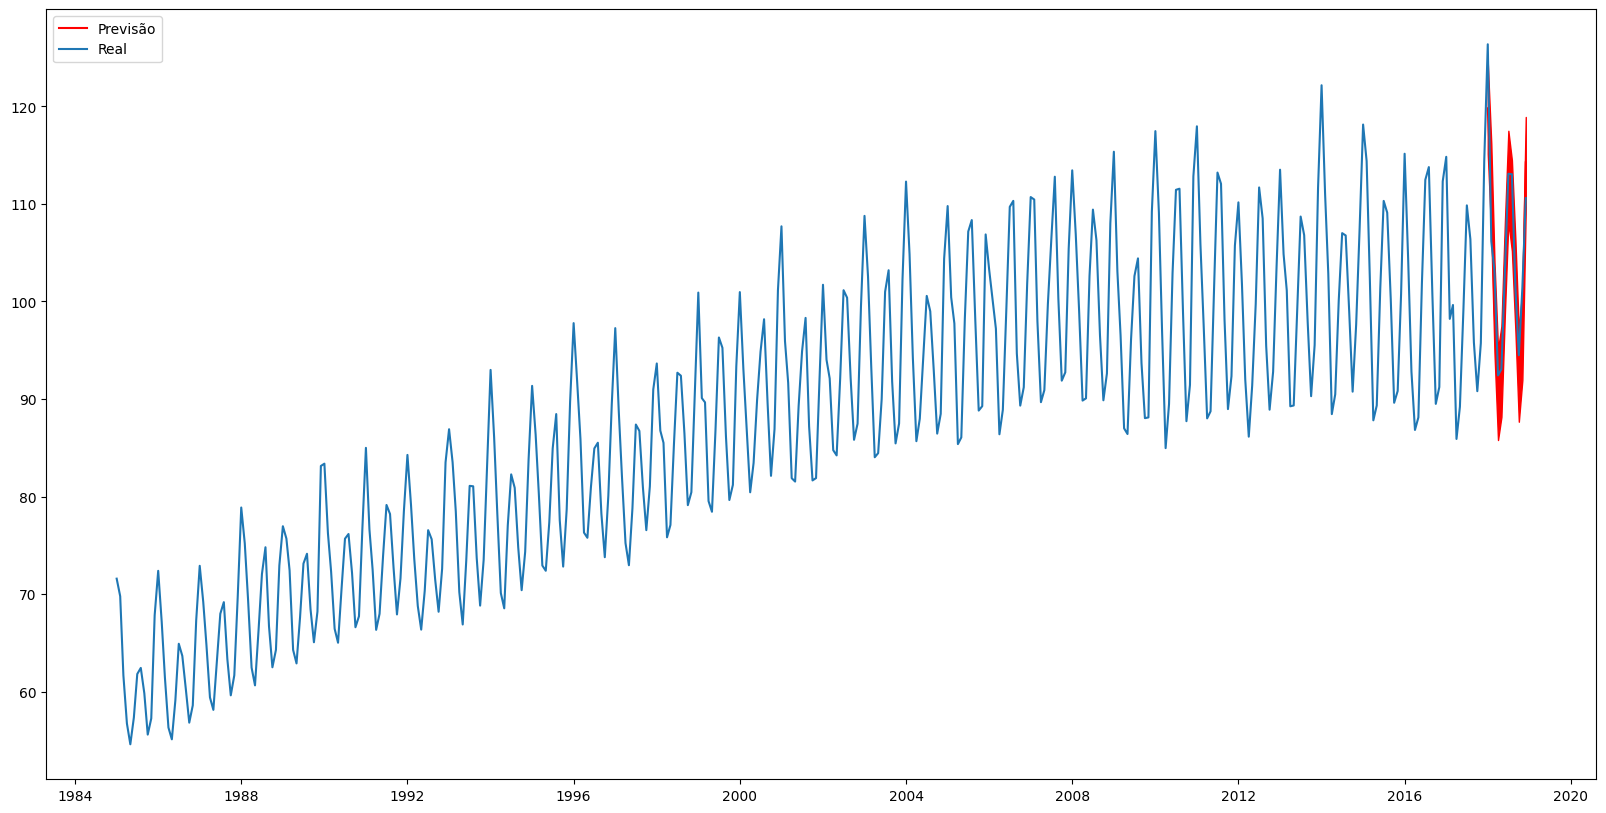

In [30]:
plt.figure(figsize=(20,10))
plt.plot(datas_prev, pred_media.values, color = 'red', label = 'Previsão')
plt.fill_between(datas_prev, limite_abaixo, limite_acima, color = 'red')
plt.plot(datas, df.values, label = 'Real')
plt.legend()
plt.show()

In [32]:
mae = mean_absolute_error(df[-12:].values, pred_media.values)
print(mae)

2.7071201498891306


In [34]:
forecast = sarimax_result.get_forecast(steps=12)
forecast_media = forecast.predicted_mean
forecast_media.size

12

In [37]:
intervalo_confianca_forecast = forecast.conf_int()
limite_abaixo_forecast = intervalo_confianca_forecast.iloc[:,0]
limite_acima_forecast = intervalo_confianca_forecast.iloc[:,1]

limite_abaixo_forecast[10], limite_acima_forecast[10]

<ipython-input-37-9fb0afab511b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_abaixo_forecast[10], limite_acima_forecast[10]


(91.38813005236821, 103.10930985132882)

In [38]:
forecast_media[10]

<ipython-input-38-f1bedd66245f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_media[10]


97.24871995184851

In [39]:
datas_forecast = np.asarray(forecast_media.index)
pred_dates = np.asarray(pred_media.index)

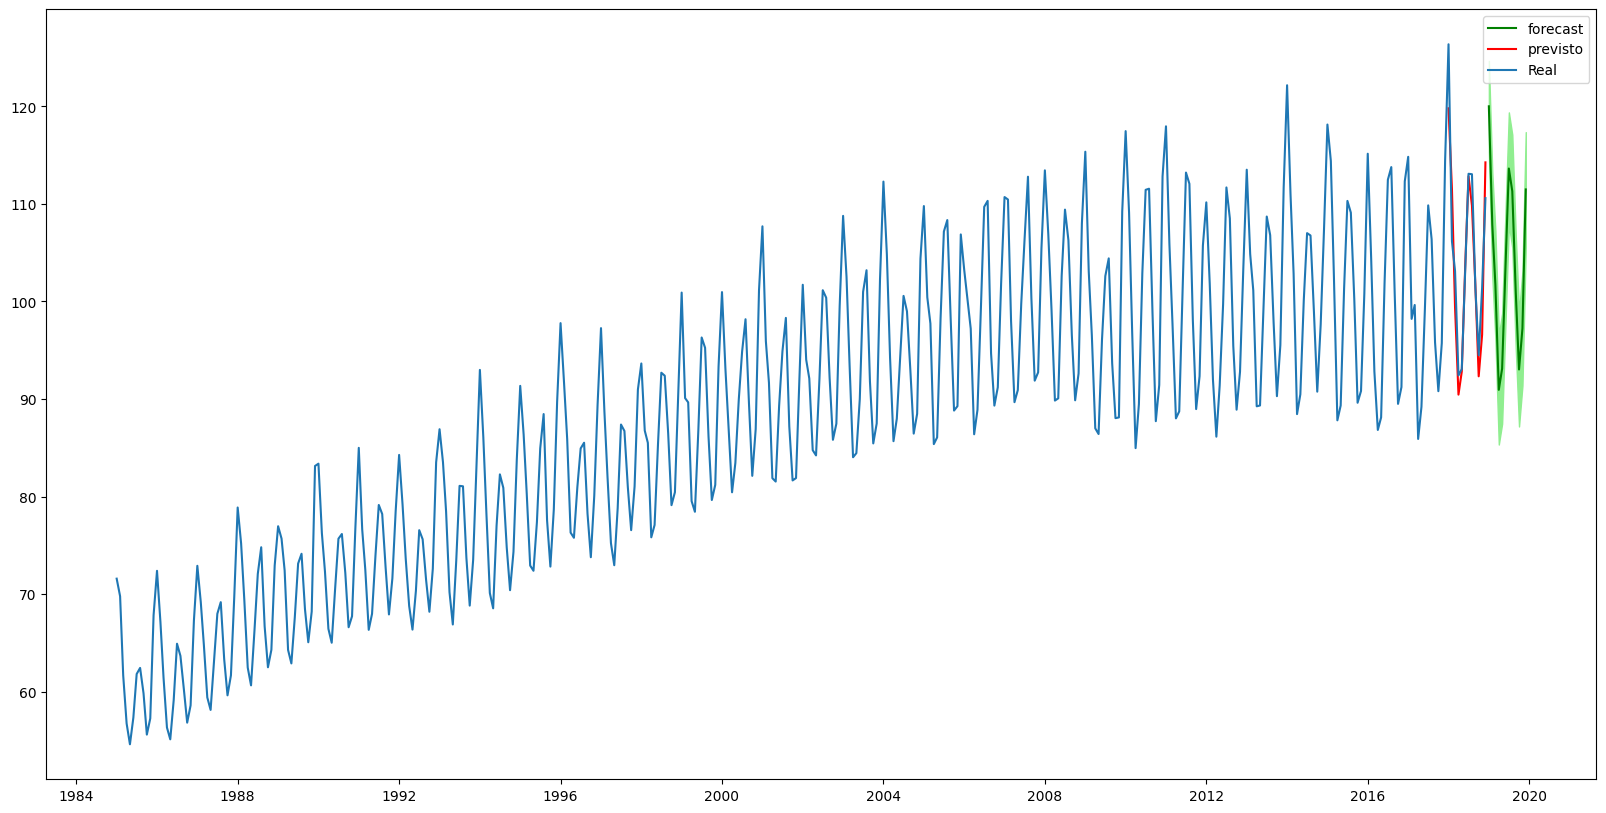

In [40]:
dates = np.asarray(df.index)
plt.figure(figsize=(20,10))
plt.plot(datas_forecast, forecast_media.values, color = 'green', label = 'forecast')
plt.fill_between(datas_forecast, limite_abaixo_forecast, limite_acima_forecast, color = 'lightgreen')
plt.plot(pred_dates, pred_media.values, color = 'red', label = 'previsto')
plt.plot(dates, df.values, label = 'Real')
plt.legend()
plt.show()